# Caso Marketing

El equipo de MKT busca enganchar a los clientes para aumentar nuestras ventas. Esto lo hacen conociendo las necesidades de los clientes y enviando mensajes específicos que comunican la propuesta de valor que buscan los clientes para lograr la venta.

Para nuestro caso somos contratados por un banco que quiere que hagamos 3 segmentos diferenciados entre sus clientes para lanzar campañas de mercadotecnia diferentes.

## Importamos librerías y Datset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#librerías para Machine learning
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

%matplotlib inline
sns.set()

In [2]:
#Iportamos el dataset:
data = pd.read_csv("Marketing_data.csv")

In [3]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
data.shape

(8950, 18)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Explicación de las columnas del Dataset:

- CUSTID: Identificación del titular de la tarjeta de crédito
- BALANCE: Cantidad de saldo que queda en la cuenta del cliente para hacer compras
- BALANCE_FREQUENCY: Frecuencia de la actualización del saldo, puntuación entre 0 y 1 (1 = actualizado con frecuencia, 0 = no actualizado con frecuencia)
- PURCHASES: Cantidad de compras realizadas desde la cuenta
- ONEOFFPURCHASES: Importe máximo de compra realizado en una sola vez
- INSTALLMENTS_PURCHASES: Importe de la compra realizada en cuotas (pago a meses)
- CASH_ADVANCE: Anticipo otorgado al usuario
- PURCHASES_FREQUENCY: frecuencia con la que se realizan las compras, puntuación entre 0 y 1 (1 = compras frecuentes, 0 = compras no frecuentes)
- PURCHASES_FREQUENCY: Frecuencia de las Compras se están realizando, puntuación entre 0 y 1 (1 = compra con frecuencia, 0 = no compra con frecuencia)
- ONEOFF_PURCHASES_FREQUENCY: Con qué frecuencia las compras se realizan de una sola vez (1 = compra con frecuencia, 0 = no compra con frecuencia)
- PURCHASES_INSTALLMENTS_FREQUENCY: Con qué frecuencia se realizan las compras a plazos (1 = se realizan con frecuencia, 0 = no se realizan con frecuencia)
- CASH_ADVANCE_FREQUENCY: con qué frecuencia el gasto se paga por adelantado
- CASH_ADVANCE_TRX: número de transacciones realizadas con "Efectivo por adelantado"
- PURCHASES_TRX: número de transacciones de compras realizadas
- CREDIT_LIMIT: límite de tarjeta de crédito para el usuario
- PAYMENTS: Número de pagos realizados por el usuario
- MINIMUM_PAYMENTS: cantidad mínima de pagos realizados por el usuario
- PRC_FULL_PAYMENT: porcentaje del pago total pagado por el usuario
- TENURE: Años que el usuario lleva usando el servicio de tarjeta de crédito

In [6]:
#Para tener la lista de columnas
data_cols= data.columns.tolist()
data_cols

['CUST_ID',
 'BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

In [7]:
#Vamos a ver un resumen Estadístico de los datos:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


Aqupodemos ver:

- La media del balance que manejan los clientes del banco es de  1,564.47.
- La frecuencia de actualización del balance es del 0.9 (se actualiza muy seguido).
- El promedio de las compras que se realizan es de  1,003
- La frecuencia de las compras está en 0.5
- El promedio de ONE_OFFPURCHASE_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY y CASH_ADVANCED_FREQUENCY es muy bajo.
- El promedio del límite de crédito es de casi 4,500
- El porcentaje del pago completo es del 15%
- Los clientes llevan en promedio 11.5 años en el banco.

- También podemos ver que hay muchas columnas con mínimos y con el 25% de los datos en 0 

Vamos a revisar un cliente que tiene una compra por 40,761.25 para darnos una idea:

In [8]:
data[data["ONEOFF_PURCHASES"]== 40761.25]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


Por ejemplo para esta persona vemos que no pide mucho dinero por adelantado, que lleva 101 compras, que tiene un límite de crédito de 22,500, y que el 25% de las veces ha pagado el total de sus deudas. Es una persona a la que probablemente no le interesaría una promoción de disposición de efectivo, por lo que para clientes como este no valdría la pena ofrecérsela.

De igual forma vemos que hay una persona que ha pedido efectivo por adelantado en 47,137.21176 así que veamos qué características tiene:

In [9]:
#Para ver el valor exacto del importe
data["CASH_ADVANCE"].max()

47137.21176

In [10]:
data[data["CASH_ADVANCE"]== 47137.21176]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


Para este caso podemos ver que mueve mucho su cuenta, pide dinero constamente.

Podemos ver que difiere de la persona anterior en la forma en que se comportan.

## Visualización de datos

### Datos nulos (imputación)

Para ver si hay datos faltantes:

<AxesSubplot:>

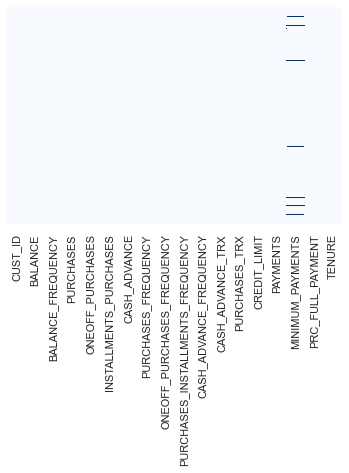

In [11]:
#De forma gráfica:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap="Blues")

In [12]:
#En forma de datos:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Vemos que hay 313 datos nulos (desconocidos) en MINIMU_PAYMENTS y 1 un caso de CREDIT_LIMIT.

Podemos **imputar** los datos faltantes con KNNImputer, para que busque 3 vecinos cercanos y pueda sustituir los datos con esos valores:

In [13]:
#Importamos librerías :
from sklearn.impute import KNNImputer

In [14]:
#Hacemos la imputación con 3 vecinos para utilizar un número impar de vecinos
imputacion = KNNImputer(n_neighbors=3)

In [15]:
#Tenemos que quitar la columna CUST_ID, hya que es un objeto:
data_imp = data.drop(["CUST_ID"], axis=1)

In [16]:
#Hacemos la Imputación y transformación de los datos
data_imp = imputacion.fit_transform(data_imp)

In [17]:
data_imp

array([[4.09007490e+01, 8.18182000e-01, 9.54000000e+01, ...,
        1.39509787e+02, 0.00000000e+00, 1.20000000e+01],
       [3.20246742e+03, 9.09091000e-01, 0.00000000e+00, ...,
        1.07234022e+03, 2.22222000e-01, 1.20000000e+01],
       [2.49514886e+03, 1.00000000e+00, 7.73170000e+02, ...,
        6.27284787e+02, 0.00000000e+00, 1.20000000e+01],
       ...,
       [2.33986730e+01, 8.33333000e-01, 1.44400000e+02, ...,
        8.24183690e+01, 2.50000000e-01, 6.00000000e+00],
       [1.34575640e+01, 8.33333000e-01, 0.00000000e+00, ...,
        5.57556280e+01, 2.50000000e-01, 6.00000000e+00],
       [3.72708075e+02, 6.66667000e-01, 1.09325000e+03, ...,
        8.82889560e+01, 0.00000000e+00, 6.00000000e+00]])

In [18]:
#Regresamos a dataset los datos:
data_imp = pd.DataFrame(data_imp,
                     columns = ['BALANCE','BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENURE'])

In [19]:
data_imp.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,448.208854,0.000000,12.0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0


In [20]:
#Comprobamos que se haya hechop la imputación (que no haya valores faltantes):
data_imp.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [21]:
#Vamos a sustituir las columnas CREDIT_LIMIT  y MINIMUM_PAYMENTS de data por las que imputamos
data["CREDIT_LIMIT"] = np.where(data["CREDIT_LIMIT"], data_imp["CREDIT_LIMIT"], data_imp["CREDIT_LIMIT"])
data["MINIMUM_PAYMENTS"] = np.where(data["MINIMUM_PAYMENTS"], data_imp["MINIMUM_PAYMENTS"], data_imp["MINIMUM_PAYMENTS"])

In [22]:
#Comprobamos que se haya hechop la imputación (que no haya valores faltantes):
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [23]:
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,448.208854,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,174.958656,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


Podemos ver que se ha integrado el dataset con las columnas imputadas.

### Datos duplicados

Vamos a ver si hay campos duplicados:

In [24]:
data.duplicated().sum()

0

Vemos que no hay datos duplicados. Por lo tanto vamos a eliminar la columna "CUST_ID" que no nos va a servir mucho.

In [25]:
data2= data.drop("CUST_ID", axis=1)

In [26]:
data2.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,448.208854,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


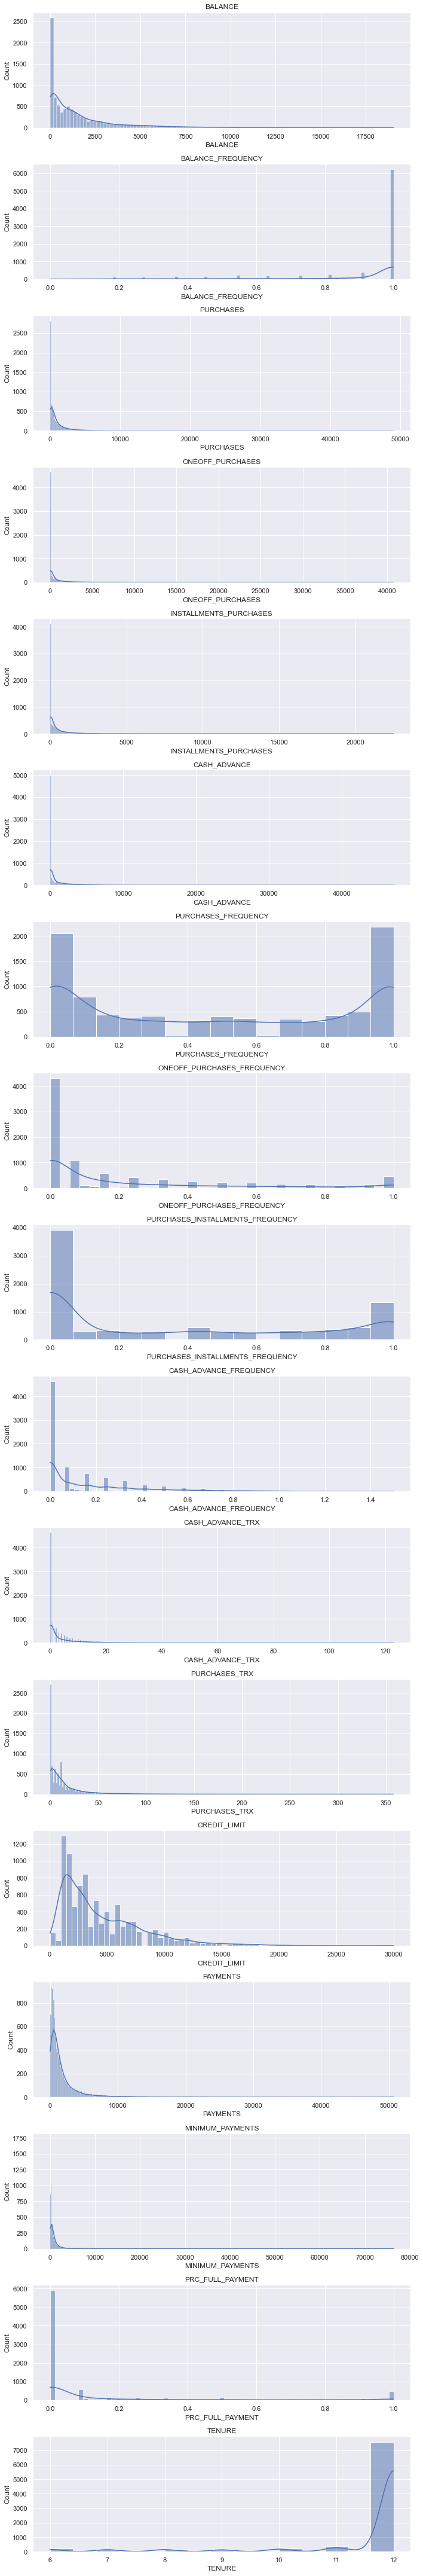

In [27]:
#Vamos a hacer gráficos de la función de densidad estimada y el histograma de frecuencias:
#Hacemos un bucle para graficar cada variable

n= len(data2.columns)
data_cols2 = data2.columns

plt.figure(figsize =(10,60))
for i in range(n):
    plt.subplot(n,1,i+1)
    sns.histplot(data2[data_cols2[i]], kde=True)
    plt.title(data_cols2[i])
    
plt.tight_layout()

Es una forma gráfica de ver cómo se distribuyen los clientes según las diferentes columnas.

Vamos a ver la correlación que hay entre las columnas:

In [28]:
correlaciones = data2.corr()

<AxesSubplot:>

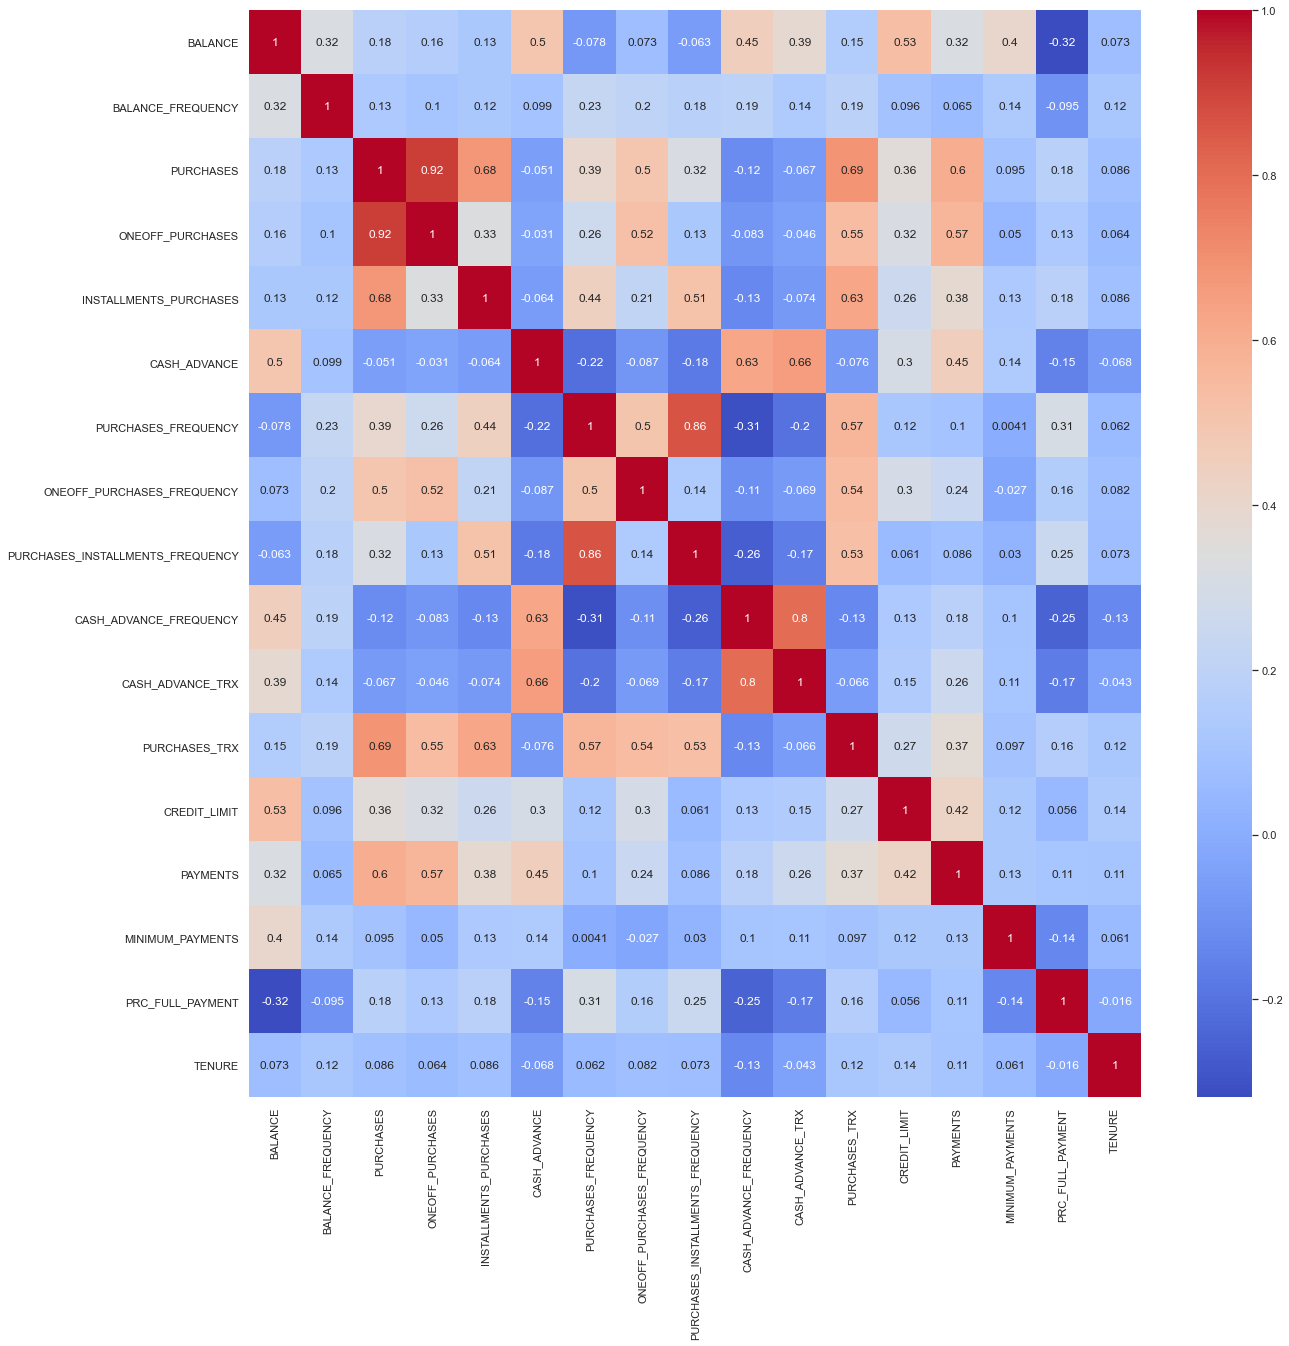

In [29]:
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(correlaciones, annot=True, cmap="coolwarm")

Vemos que la mayoría de correlaciones son positivas (cuando crece una crece la otra) y que hay pocas negativas (llega a -0.32).

Podemos ver que hay correlaciones positivas altas en:
- Purchase y Oneoff_purchase: quien compra mucho lo hace de forma directa (sin meses 0.92), mientras que los que compran a crédito (Instaments_Purchases) tiene una correlación de 0.68.
- También están las correlaciones las compras con el número de interacciones.
- Cuanto mayor es la frecuencia de compras (Purchase_frequency), mayor son las compras aplazadas (Purchase_Installments_Frequency).
- Etc.

### Encontrar el número de clústers óptimo (k) para KMeans

Vamos a utilizar el método del codo para obtener el número óptimo de clústers para dividir el dataset.

Lo primero que hacemos es escalar los datos para normalizarlos.

In [30]:
scaler= StandardScaler()

In [31]:
#Creamos el nuevo dataset con los  datos escalados:
data_scalado = scaler.fit_transform(data2)

In [32]:
#comprobamos el numero de filas y columnas
data_scalado.shape

(8950, 17)

In [33]:
#vemos los datos escalados
data_scalado

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.3039713 ,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.09272875,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.09653771,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.32825028,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.33958901,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.32575373,
        -0.52555097, -4.12276757]])

In [34]:
#Vamos a hacer una función que haga la regla del codo

def regla_codo (data):
    """
    Función pada realizar la regla del codo con KMeans.
    
    Arguments:
    - dataset
    
    Ouput:
    - Gráfico con los codos desde k=1 hasta k=20
    """
    from sklearn.cluster import KMeans
    
    scores=[]
    range_values= range(1,20)
    
    #Bucle para encontrar el mejor cluster en rango del 1 al 20
    for i in range_values:
        kmeans = KMeans(n_clusters= i, random_state=42)
        kmeans.fit(data)
        scores.append(kmeans.inertia_)  #WCSS
    
    #Gráfico:
    
    plt.figure(figsize=(10,6))
    plt.plot(range_values, scores, "bx-")
    plt.title("Número óptimo de clústers")
    plt.xlabel("Clústers")
    plt.ylabel("WCSS(k)")
    plt.show()
    

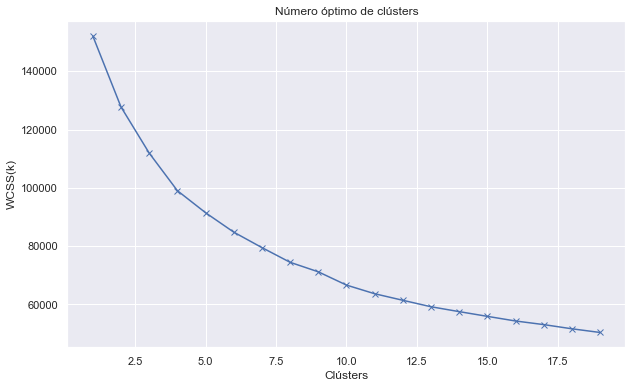

In [35]:
regla_codo(data_scalado)

La gráfica nos muestra 2 codos:
- k = 4 hay una bajada significativa, pero sigue bajando el numero WCSS.
- k = 8 A partir de ahí no hay mucho cambio en el WCSS.

Vamos a utlizar `k=8` para hacer 8 clústers.

## Aplicar el modelo (KMeans) con el método del codo aplicado

In [36]:
#Creamos el modelo
kmeans= KMeans(8, random_state=42)

In [37]:
#entrenamos el modelo:
kmeans.fit(data_scalado)

KMeans(random_state=42)

KMeans clasifica, para este caso en 8 grupos, y devuelve una etiqueta para cada observación (cliente/fila). Para ver esas etiquetas:

In [38]:
#Para ver las etiquetas:
labels = kmeans.labels_

In [39]:
labels

array([7, 2, 0, ..., 1, 1, 1], dtype=int32)

Esto quiere decir que  la primera observación cae en el clúster 7, la segunda en el 2, la tercera en el 0... y las últimas 3 en el 1.

Para ver los varicentros (centros de cada variable):

In [40]:
kmeans.cluster_centers_

array([[-1.22038773e-01,  4.01985505e-01,  5.53258494e-01,
         6.77364548e-01,  6.35402977e-02, -3.31021634e-01,
         9.90020064e-01,  1.91038699e+00,  1.96180274e-01,
        -4.12921001e-01, -3.28884362e-01,  6.46458323e-01,
         4.46391981e-01,  1.56927196e-01, -1.52365484e-01,
         4.45048886e-01,  2.71249083e-01],
       [-3.36535626e-01, -3.46747819e-01, -2.86714221e-01,
        -2.12512849e-01, -2.87144227e-01,  6.80826853e-02,
        -2.00686078e-01, -2.82972315e-01, -2.25256157e-01,
         3.06399135e-01, -2.97752756e-04, -3.87157754e-01,
        -5.64555632e-01, -3.91392332e-01, -2.13923664e-01,
         1.44736806e-02, -3.20069111e+00],
       [ 1.68376227e+00,  3.91862695e-01, -2.19740437e-01,
        -1.56722871e-01, -2.31711700e-01,  2.01983298e+00,
        -4.77650056e-01, -2.11362547e-01, -4.18343819e-01,
         1.92334843e+00,  1.92877366e+00, -2.70362515e-01,
         1.02642003e+00,  8.20873284e-01,  5.13725542e-01,
        -3.90633949e-01,  6.8

In [41]:
#Viendo el resulmen.
kmeans.cluster_centers_.shape

(8, 17)

Para visualizar los centros de cada clúster de cada columna:

In [42]:
cluster_centers = pd.DataFrame(data= kmeans.cluster_centers_, columns=[data_cols2])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.122039,0.401986,0.553258,0.677365,0.063540,-0.331022,0.990020,1.910387,0.196180,-0.412921,-0.328884,0.646458,0.446392,0.156927,-0.152365,0.445049,0.271249
1,-0.336536,-0.346748,-0.286714,-0.212513,-0.287144,0.068083,-0.200686,-0.282972,-0.225256,0.306399,-0.000298,-0.387158,-0.564556,-0.391392,-0.213924,0.014474,-3.200691
2,1.683762,0.391863,-0.219740,-0.156723,-0.231712,2.019833,-0.477650,-0.211363,-0.418344,1.923348,1.928774,-0.270363,1.026420,0.820873,0.513726,-0.390634,0.068842
3,-0.701176,-2.137120,-0.309770,-0.234452,-0.301605,-0.322638,-0.553012,-0.440411,-0.438930,-0.521625,-0.376608,-0.418014,-0.176294,-0.202669,-0.296478,0.286244,0.199386
4,-0.358488,0.333069,-0.030455,-0.240277,0.369224,-0.361516,0.993060,-0.380925,1.204440,-0.471573,-0.359058,0.192427,-0.257818,-0.213095,-0.030797,0.309181,0.256619
5,1.865907,0.332878,12.596844,13.111182,5.696389,-0.004178,1.033322,2.170634,0.866221,-0.476183,-0.214854,4.566558,3.174193,8.991136,1.059517,1.236317,0.295702
6,1.079009,0.473690,2.569413,1.870581,2.638856,-0.133631,1.160129,1.562482,1.261846,-0.277527,-0.136609,3.178878,1.331680,1.510914,0.696128,0.266367,0.336361
7,0.013076,0.404348,-0.356621,-0.240978,-0.400397,-0.095114,-0.851298,-0.391306,-0.755060,0.102775,-0.028333,-0.480904,-0.302440,-0.250510,0.004992,-0.455410,0.273709


El dataset anterior es con los datos escalados, por lo que tenemos que regresar al dataset original para ver las cantidades originales.

In [43]:
cluster_centers= scaler.inverse_transform(cluster_centers)
cluster_centers

array([[1.31046142e+03, 9.72497380e-01, 2.18525013e+03, 1.71672379e+03,
        4.68526348e+02, 2.84703282e+02, 8.87693441e-01, 7.72363180e-01,
        4.42404400e-01, 5.25144929e-02, 1.00443262e+00, 3.07783688e+01,
        6.11837524e+03, 2.18743271e+03, 4.96007145e+02, 2.83883817e-01,
        1.18803191e+01],
       [8.64004329e+02, 7.95129369e-01, 3.90635481e+02, 2.39709567e+02,
        1.51406683e+02, 1.12164368e+03, 4.09805527e-01, 1.18041553e-01,
        2.74914784e-01, 1.96457795e-01, 3.24679487e+00, 5.08653846e+00,
        2.44004274e+03, 6.00101401e+02, 3.51254599e+02, 1.57947952e-01,
        7.23397436e+00],
       [5.06908386e+03, 9.70099380e-01, 5.33726002e+02, 3.32309505e+02,
        2.01533629e+02, 5.21455522e+03, 2.98646499e-01, 1.39404136e-01,
        1.98176809e-01, 5.20025854e-01, 1.64112903e+01, 7.98963134e+00,
        8.22880708e+03, 4.10949158e+03, 2.06230382e+03, 3.94609159e-02,
        1.16094470e+01],
       [1.05036744e+02, 3.71006814e-01, 3.41375582e+02, 2.032

In [44]:
#Lo hacemos dataset para visualizarlo mejor:
cluster_centers= pd.DataFrame(data=cluster_centers, columns=[data_cols2])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1310.461422,0.972497,2185.250133,1716.723785,468.526348,284.703282,0.887693,0.772363,0.442404,0.052514,1.004433,30.778369,6118.375242,2187.432708,496.007145,0.283884,11.880319
1,864.004329,0.795129,390.635481,239.709567,151.406683,1121.643684,0.409806,0.118042,0.274915,0.196458,3.246795,5.086538,2440.042735,600.101401,351.254599,0.157948,7.233974
2,5069.083860,0.970099,533.726002,332.309505,201.533629,5214.555218,0.298646,0.139404,0.198177,0.520026,16.411290,7.989631,8228.807080,4109.491577,2062.303819,0.039461,11.609447
3,105.036744,0.371007,341.375582,203.295818,138.330017,302.284771,0.268400,0.071075,0.189995,0.030762,0.678752,4.319562,3852.731403,1146.437031,157.130258,0.237436,11.784148
4,818.312468,0.956172,938.138084,193.626820,744.952390,220.754604,0.888914,0.088820,0.843113,0.040778,0.798519,19.492840,3556.108742,1116.255105,781.872810,0.244145,11.860741
5,5448.201718,0.956126,27916.555652,22354.314348,5562.241304,970.110470,0.905072,0.850000,0.708696,0.039855,1.782609,128.217391,16043.478261,27761.600386,3345.718254,0.515316,11.913043
6,3810.340758,0.989484,6492.796036,3697.218935,2797.352249,698.639679,0.955966,0.668576,0.865927,0.079608,2.316568,93.724852,9339.497041,6107.091902,2491.218699,0.231623,11.967456
7,1591.691657,0.973057,241.277556,192.463466,48.993524,779.412981,0.148684,0.085724,0.064357,0.155711,3.055475,2.756345,3393.751511,1007.942945,866.030447,0.020515,11.883611


Con esto podemos ver:
- Uno de los grupos (**clúster 5**) tiene compras de 27,916 y hechas en un pago, mayor balance en su cuenta 5,448, y también son los que piden más efectivo (3er lugar)
- Los del **cluster 2:** Tienen un balance alto 5,069, compras relativamente bajas 30% y piden dinero en efectivo por 5,214 (los que más piden).
- **Clúster 1** Clientes con poco tiempo (7.23 años de antigüedad), no tienen mucho dinero en el banco, compran poco, piden mucho efectivo.
- etc.

Para agregar el clúster al que peretenece cada cliente:

In [45]:
data_claster = pd.concat([data2, pd.DataFrame({"CLUSTER": labels})], axis=1)

In [46]:
data_claster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,7
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,448.208854,0.000000,12,7
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,7


Vamos a visualizar histogramas para cada cada clúster y darnos una idea de cada grupo

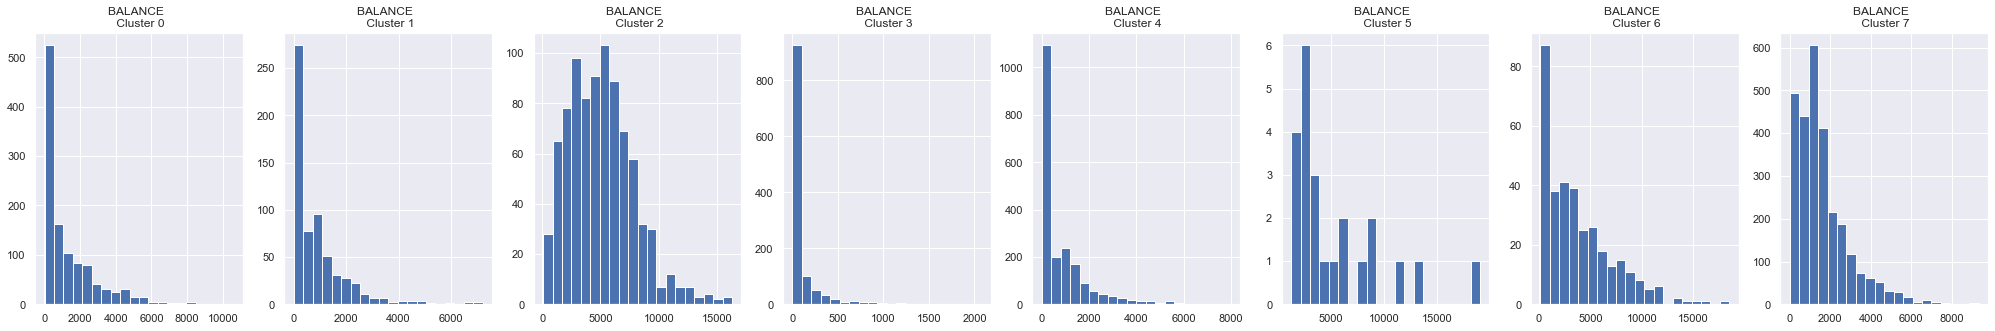

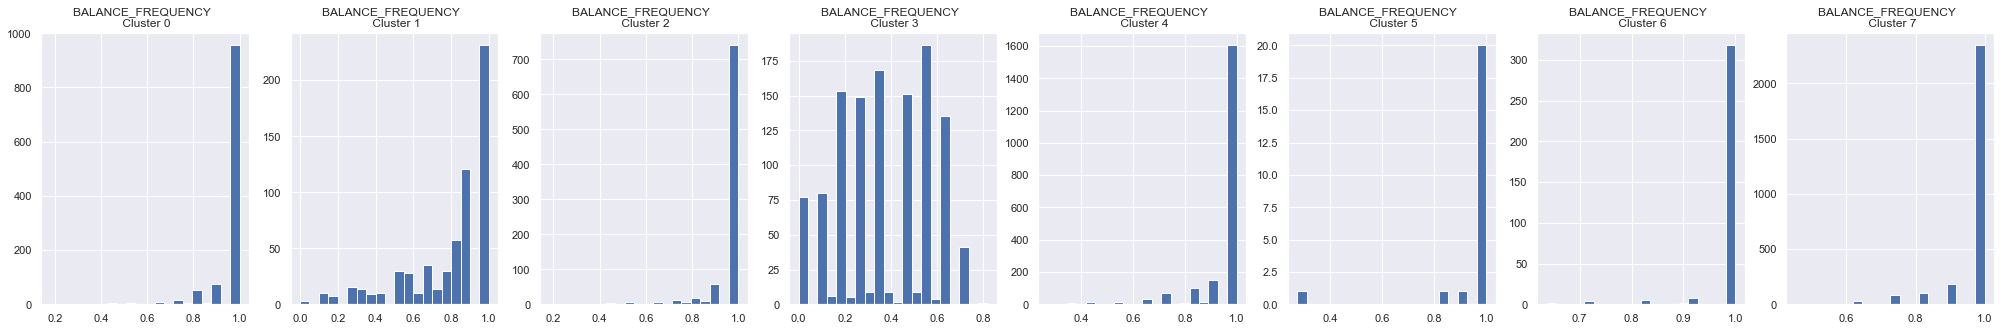

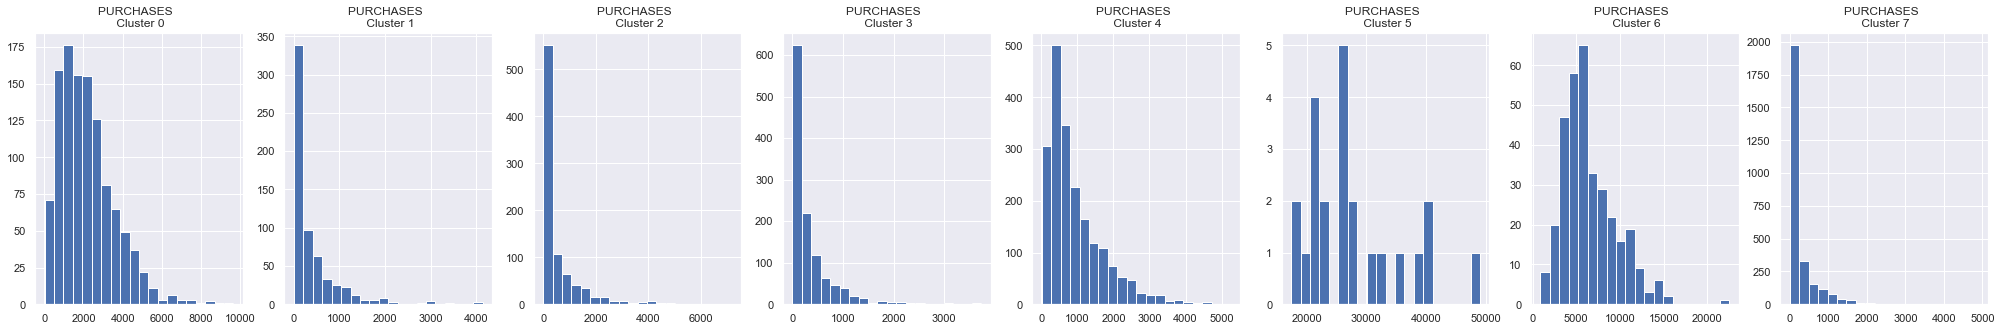

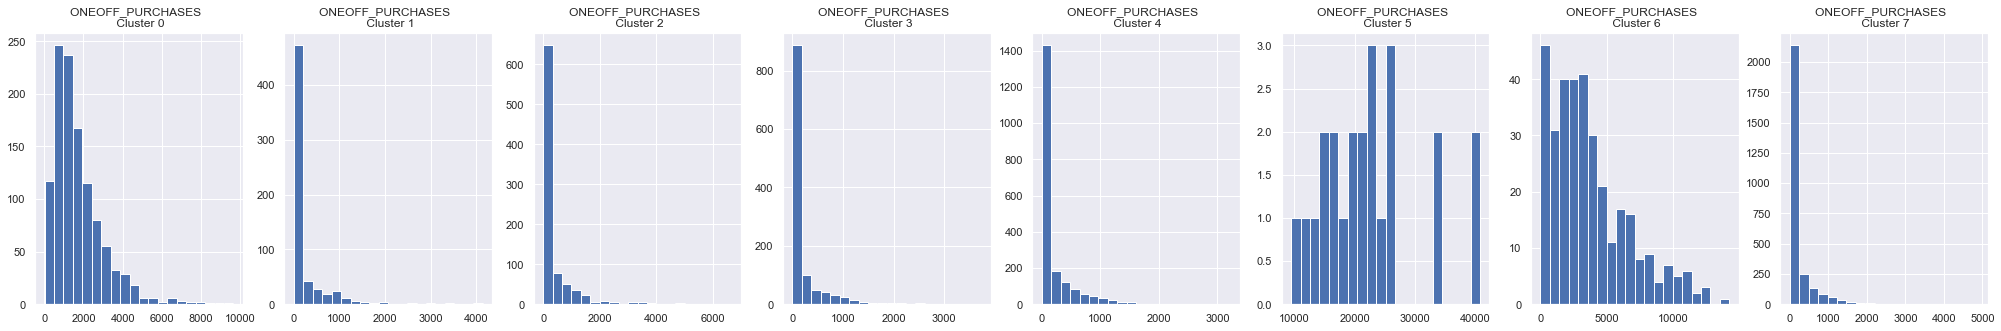

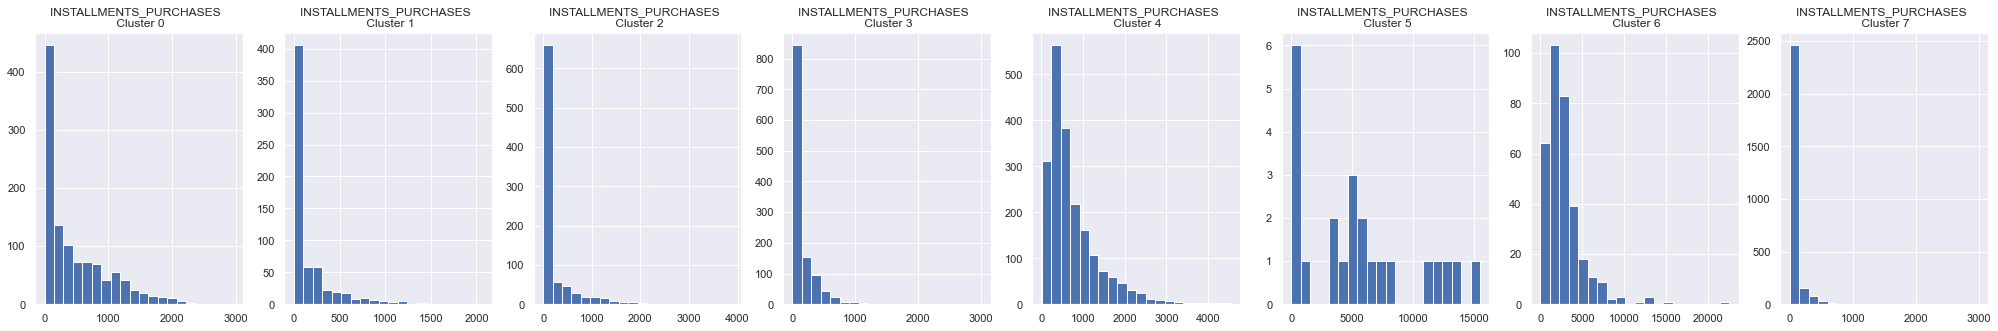

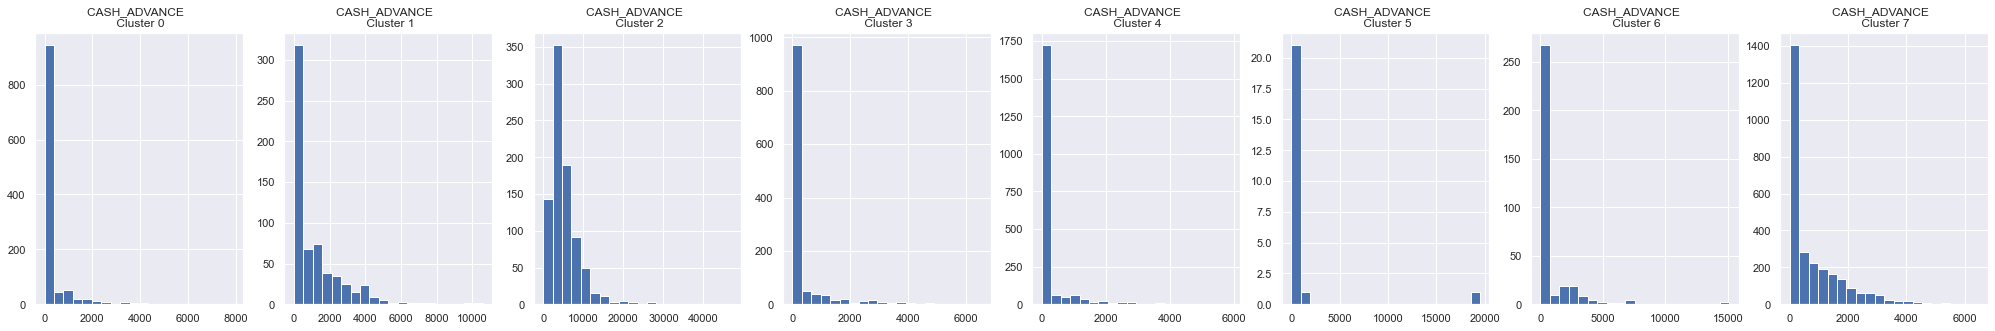

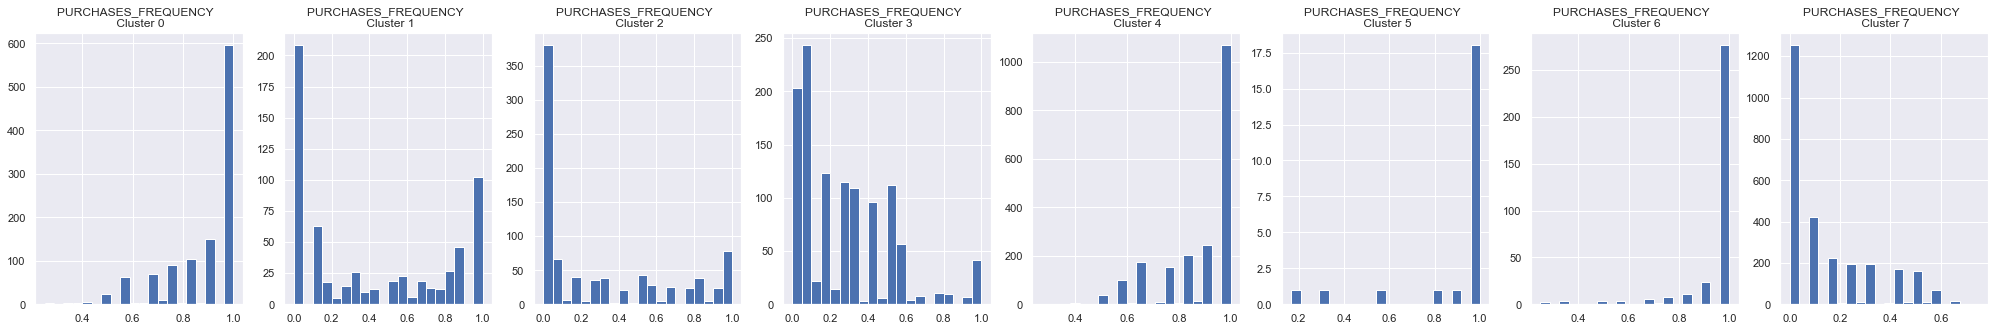

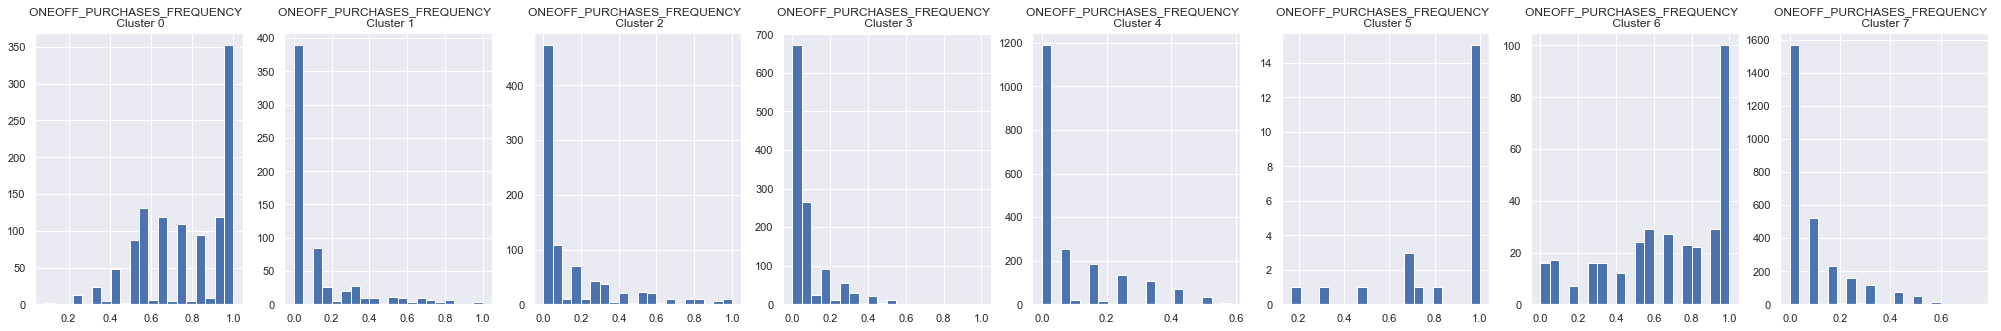

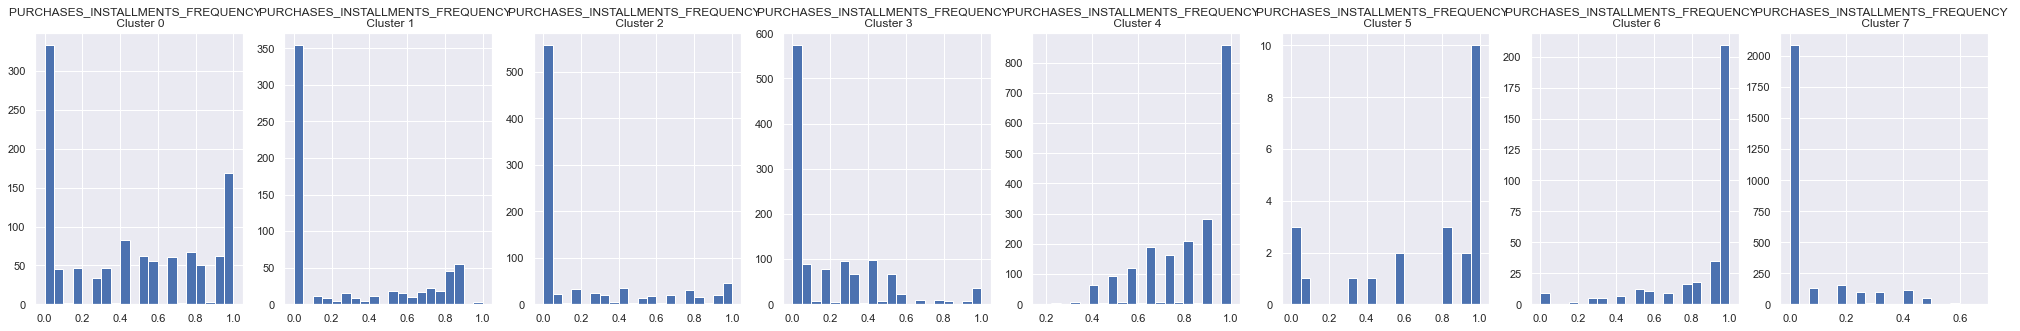

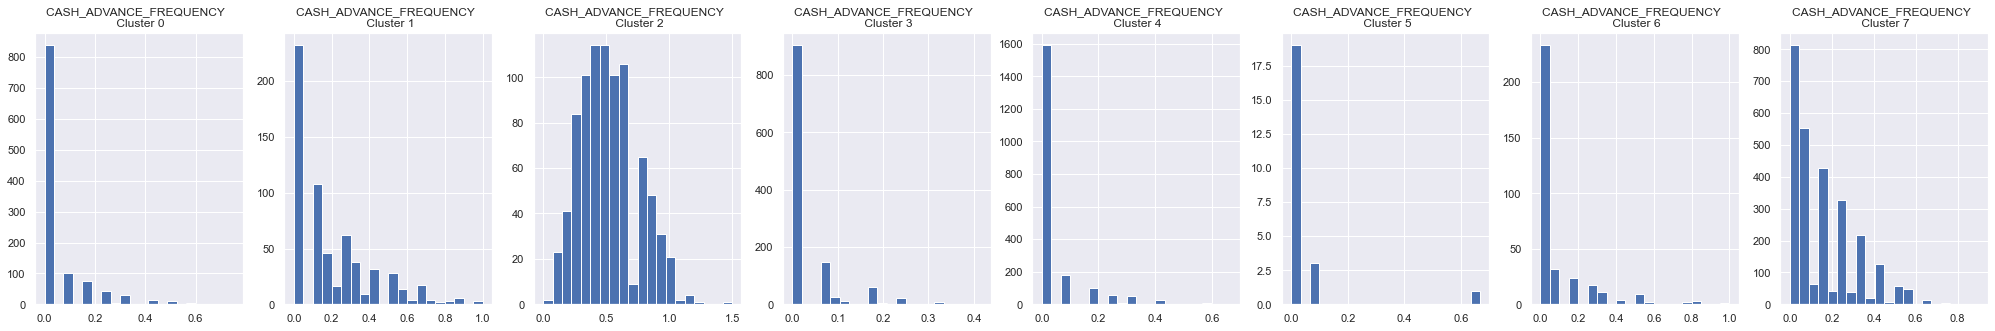

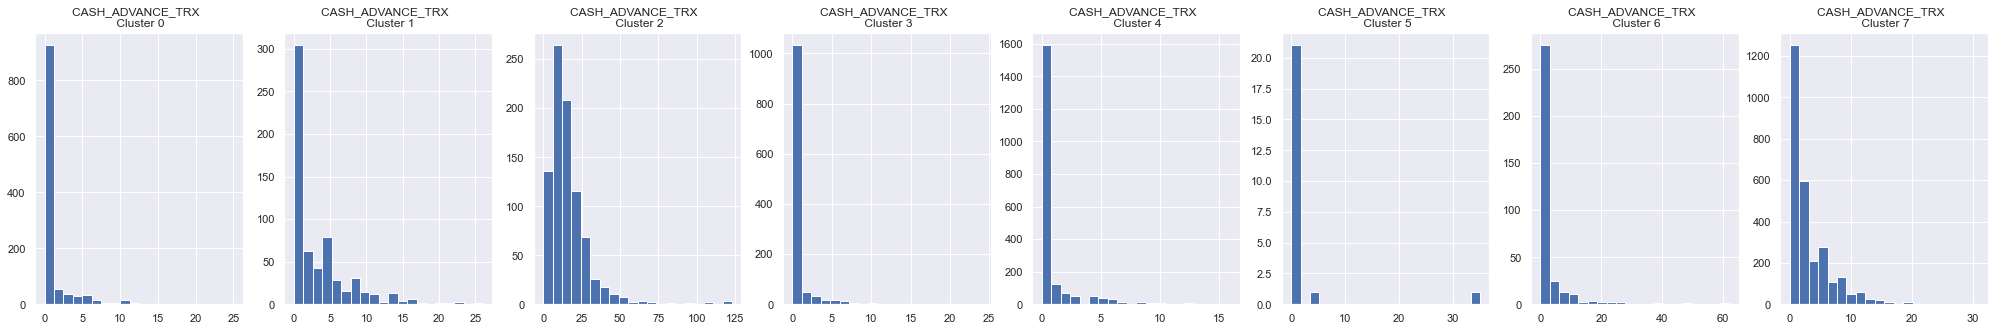

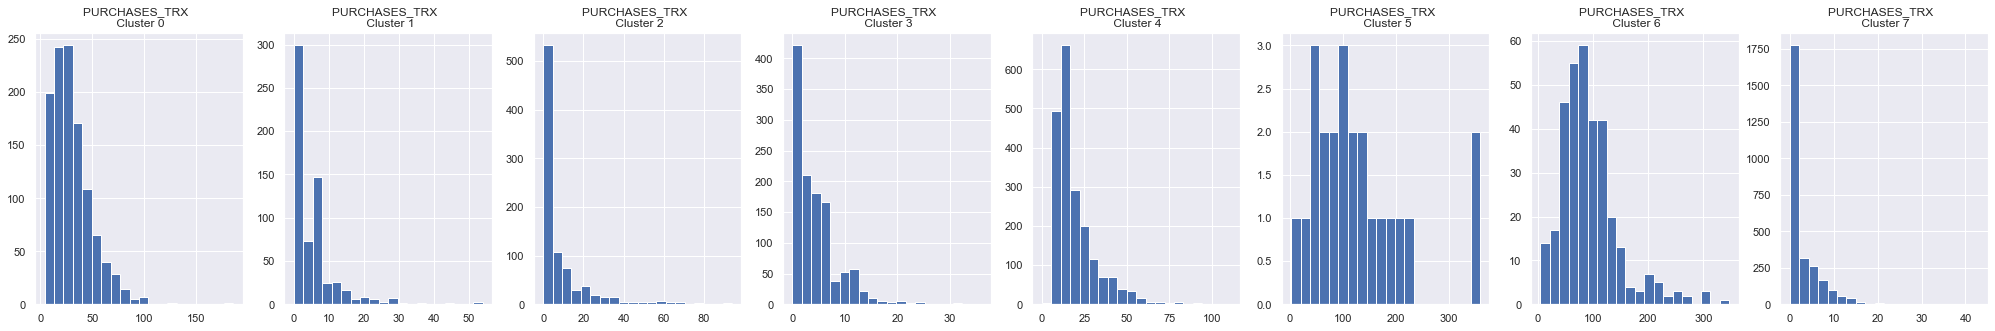

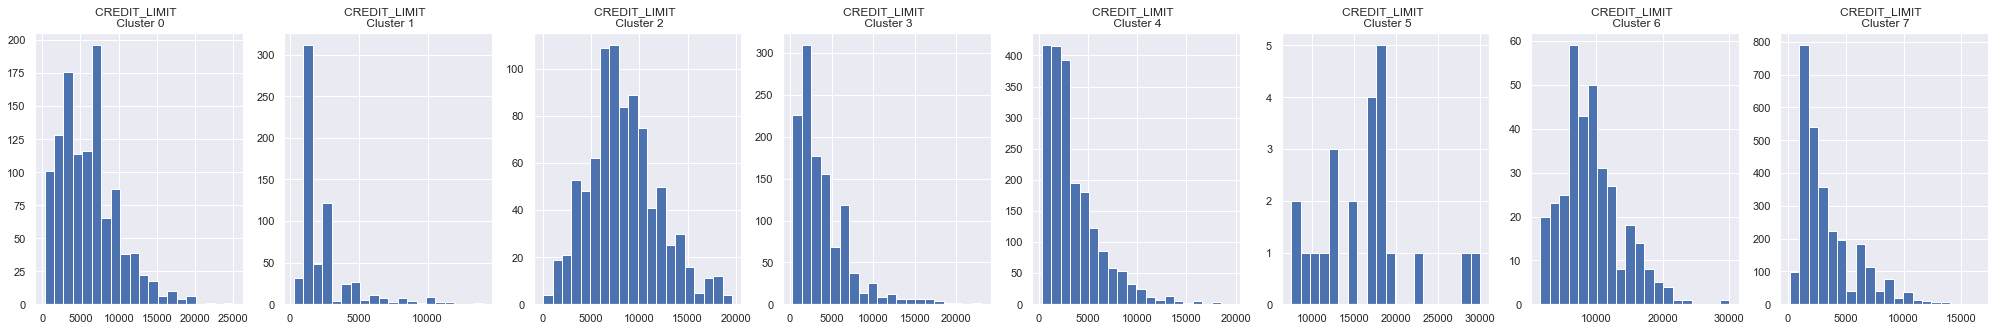

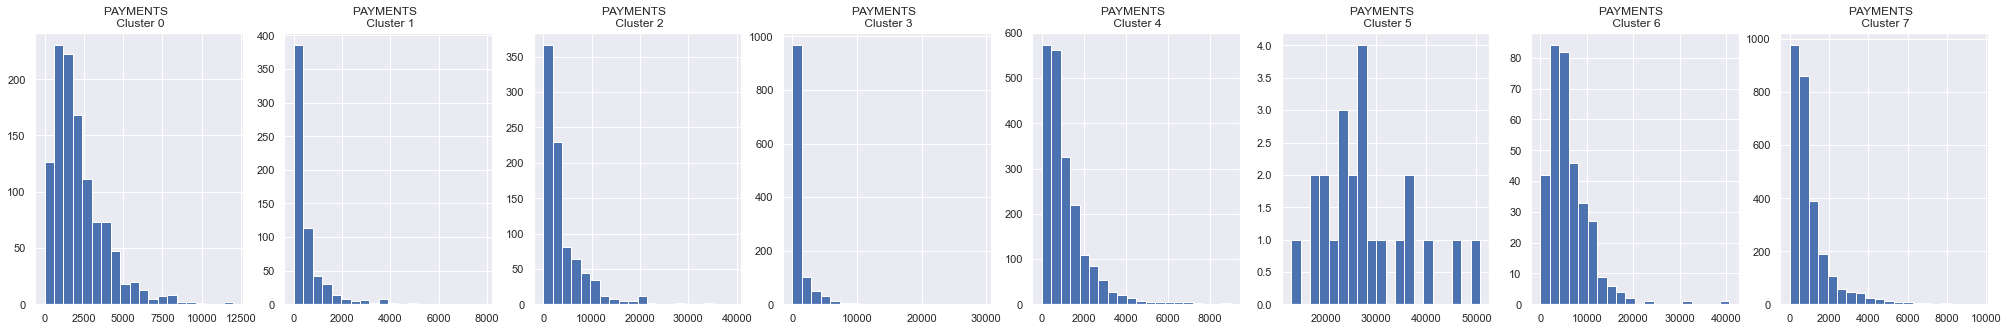

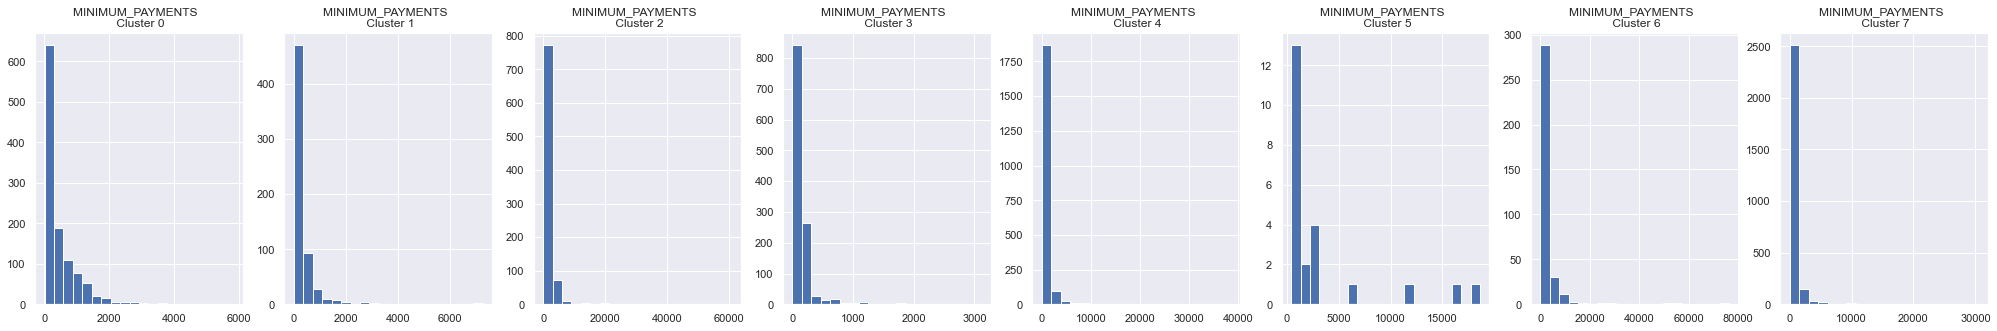

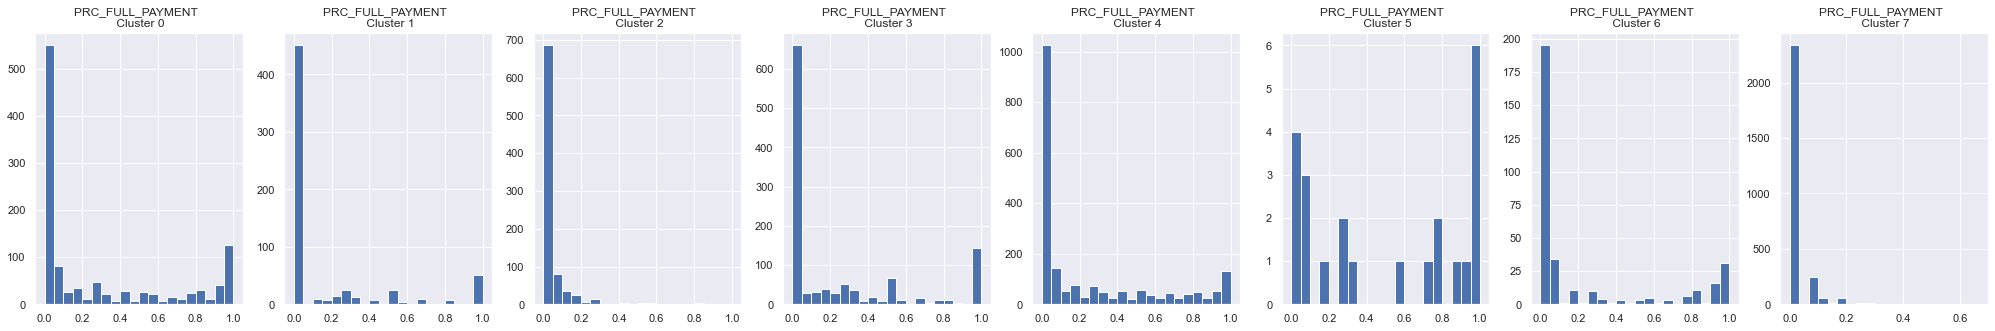

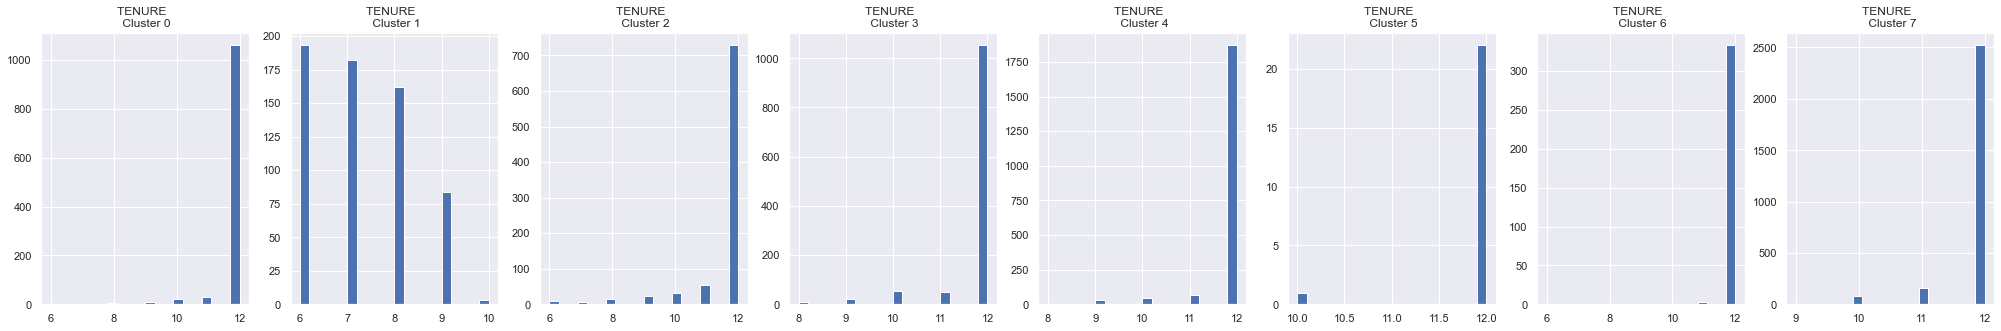

In [47]:
for i in data_cols2:
    plt.figure(figsize=(35,5))
    for j in range(8):
        plt.subplot(1, 8, j+1)
        cluster= data_claster[data_claster["CLUSTER"]==j]
        cluster[i].hist(bins=20)
        plt.title("{}  \n Cluster {}".format (i, j))
    plt.show()

Estos histogramas nos permiten hacer un análisis visual de los datos.

**IMPORTANTE:** Revisar que la escala en `x` es diferente para cada gráfico.

Esto nos permite que si llega un nuevo cliente, lo podamos clasificar en base a sus características en alguno de estos clústers.

### Componentes principales

In [48]:
#creamos el modelo de reducción de dimensionalidad con 2 componentes:
pca= PCA(n_components=2)

In [49]:
#hacemos la transformación:
principal_comp = pca.fit_transform(data_scalado)

In [50]:
principal_comp

array([[-1.68338067, -1.0729751 ],
       [-1.13498561,  2.50724019],
       [ 0.9695738 , -0.38332394],
       ...,
       [-0.92857529, -1.8089005 ],
       [-2.33760427, -0.65509012],
       [-0.5577062 , -0.40190095]])

Vemos que ha cambiado las 17 columnas que teníamos anteriormente por 2 valores `x,y` que podemos representar en dos dimensiones.

Para visualizarlo mejor creamos un dataset:

In [51]:
principal_comp= pd.DataFrame(data=principal_comp, columns=["pca_1", "pca_2"])
principal_comp

,pca_1,pca_2
0,-1.683381,-1.072975
1,-1.134986,2.507240
2,0.969574,-0.383324
3,-0.884655,0.013201
4,-1.599793,-0.684169
...,...,...
8945,-0.362003,-2.013831
8946,-0.584148,-1.685983
8947,-0.928575,-1.808901
8948,-2.337604,-0.655090


Concatenamos este dataset con los clústers que ya teníamos para tener el clúster al que pertenece vcada cliente:

In [52]:
principal_comp= pd.concat([principal_comp, pd.DataFrame({"cluster":labels})],axis=1)
principal_comp

,pca_1,pca_2,cluster
0,-1.683381,-1.072975,7
1,-1.134986,2.507240,2
2,0.969574,-0.383324,0
3,-0.884655,0.013201,7
4,-1.599793,-0.684169,7
...,...,...,...
8945,-0.362003,-2.013831,1
8946,-0.584148,-1.685983,1
8947,-0.928575,-1.808901,1
8948,-2.337604,-0.655090,1


Con estos datos ya podemos graficar en dos dimensiones diferenciados por los colores de cada clúster 

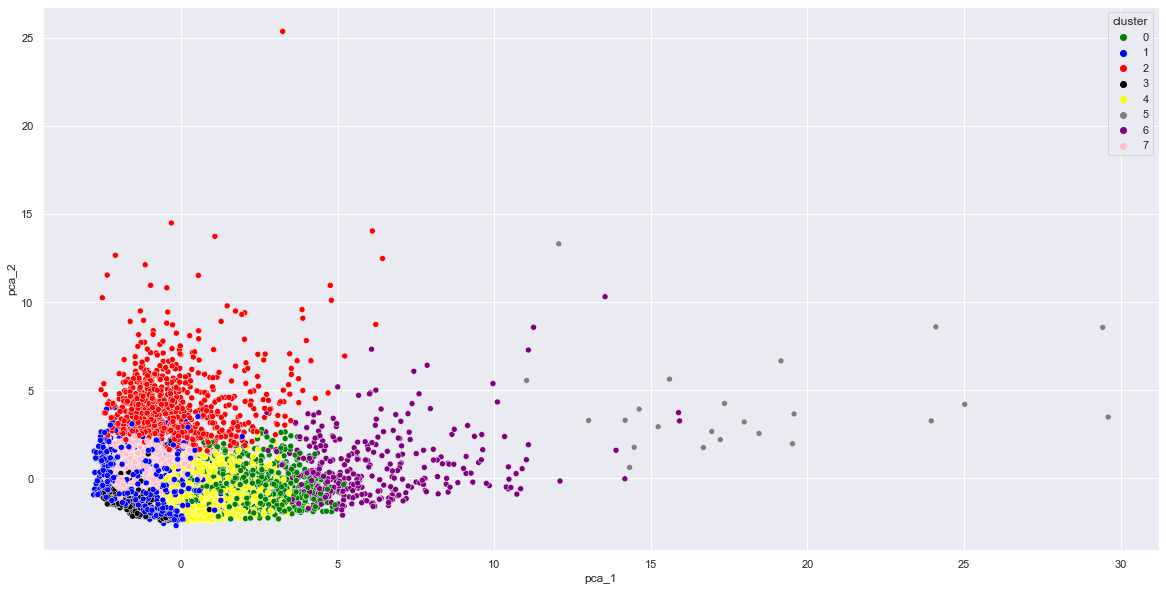

In [53]:
plt.figure(figsize=(20,10))
sns.scatterplot(data= principal_comp, x="pca_1", y="pca_2", hue="cluster",
               palette=["green", "blue", "red", "black", "yellow", "gray", "purple", "pink"])
plt.show()

Este gráfico nos permite visualizar a los clientes con la reducción  de dimensionalidad aplicada vista desde 2 dimensiones. Aquí podemos ver la forma en que se agrupan los clientes.

Se puede ver que los clústers que marcan diferencias son:
- 2,
- 5,
- 6,

mientras que el resto de los clústers están un poco más juntos (hay pocas diferencias entre los límites de pertenecer a un clúster o a otro).

Vamos rehacer el dataset original con el número de cliente (CUST_ID) y el clúster al que peretenece cada uno, para que quede trabajable.

In [59]:
final_data= pd.concat([data, pd.DataFrame({"CLUSTER": labels})], axis=1)
final_data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,7
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,448.208854,0.000000,12,7
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,1
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,174.958656,0.000000,6,1
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,1
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,1


Y si lo deaseamos podemos filtrar el dataset acomodándolo por clúster

In [63]:
final_data=final_data.sort_values("CLUSTER")
final_data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
7523,C17727,286.814503,1.000000,2016.14,1602.14,414.00,0.000000,0.666667,0.416667,0.333333,0.000000,0,14,1200.0,1525.089652,191.602655,0.000000,12,0
779,C10808,4343.537475,1.000000,1326.30,1326.30,0.00,1123.247578,1.000000,1.000000,0.000000,0.166667,2,23,4500.0,1373.689245,3414.220124,0.000000,12,0
8563,C18796,258.541401,1.000000,2260.29,2088.59,171.70,0.000000,0.916667,0.750000,0.416667,0.000000,0,18,1800.0,1268.746941,206.784480,0.600000,12,0
777,C10806,708.509086,1.000000,2109.61,1734.61,375.00,366.008558,1.000000,0.583333,1.000000,0.166667,3,19,6500.0,4591.162882,296.681069,0.181818,12,0
5929,C16095,319.696908,1.000000,3884.19,2265.90,1618.29,0.000000,1.000000,1.000000,0.833333,0.000000,0,43,9000.0,3682.437155,212.358132,0.416667,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4587,C14713,3212.963003,1.000000,0.00,0.00,0.00,185.532602,0.000000,0.000000,0.000000,0.083333,2,0,3500.0,766.728773,1044.358428,0.000000,12,7
4583,C14709,11.902047,0.818182,0.00,0.00,0.00,482.992567,0.000000,0.000000,0.000000,0.083333,1,0,3000.0,727.929858,5.038210,0.142857,12,7
4580,C14706,3261.241461,1.000000,0.00,0.00,0.00,154.672040,0.000000,0.000000,0.000000,0.083333,1,0,6500.0,800.677168,1588.441785,0.000000,12,7
4599,C14725,1731.459785,1.000000,288.47,0.00,288.47,37.454878,0.416667,0.000000,0.416667,0.083333,2,5,1700.0,673.923580,1361.538435,0.000000,12,7


Para ver cuántos clientes caen en cada clúster:

In [58]:
final_data.groupby("CLUSTER", sort=False, as_index=False).size().sort_values(by="CLUSTER",ascending=False)
final_data

,CLUSTER,size
0,7,2759
4,6,338
7,5,23
3,4,2025
5,3,1185
1,2,868
6,1,624
2,0,1128


## Conclusión:

Según cada clúster que realizamos podemos hacer productos que se "adapten a las necesidades" de cada grupo de clientes (clúster) y así aumentar la permanencia de nuestros clientes y, a la vez, aumentar nuestras ganancias.